#  Time Series Forecasting project
### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

###### Data set for the Problem: Sparkling.csv and Rose.csv
##### We are required to perform all the questions on each of the dataset separately.


## Sparkling.csv forecasting

## Packages Used:

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

D:\PYTHON\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Dataset Background:
- Monthly Sales Data of 'Sparkling' Wine manufactured by ABC Estate Wines starting from Jan 1980 to July 1995 is provided.
- As an analyst in the ABC Estate Wines, the task is to analyse and forecast Wine Sales in the 20th century.

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
sparkling_df = pd.read_csv("Sparkling.csv", parse_dates= True, index_col= 'YearMonth')  # Sparkling
#index_col= 'YearMonth'
display(sparkling_df.index)
sparkling_df.head()

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


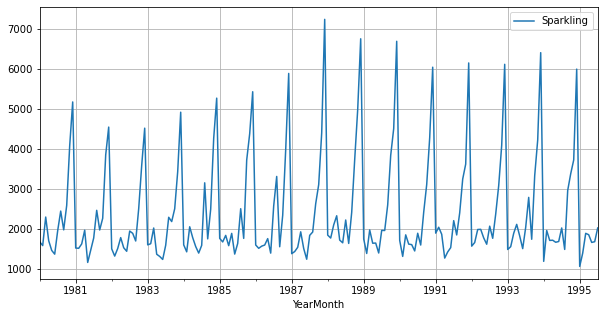

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5


sparkling_df.plot(grid = True)


plt.show()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [4]:
#summary
print("Sparkling:")
display(round(sparkling_df.describe(),3))


Sparkling:


,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [5]:
#missing values 
display(sparkling_df.isna().sum())




Sparkling    0
dtype: int64

In [6]:
sparkling_df1 = sparkling_df.copy()
sparkling_df1['Year'] = sparkling_df1.index.year
sparkling_df1['Month'] = sparkling_df1.index.month
display(sparkling_df1.head())



,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


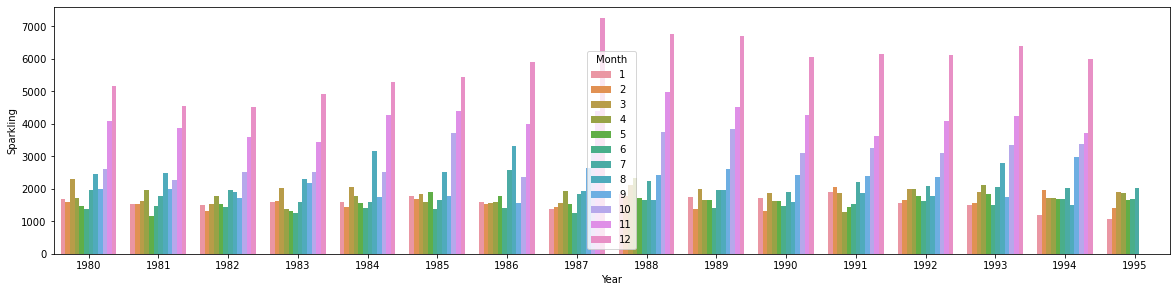

In [7]:
plt.figure(figsize=(20, 10))
ax1= plt.subplot(2,1,1)
sns.barplot(x = sparkling_df1['Year'], y = sparkling_df1['Sparkling'], hue= sparkling_df1['Month'], ax= ax1, )


In [8]:
display("Sparkling:", sparkling_df1.pivot_table(values = 'Sparkling', index = 'Year', aggfunc='mean', columns = 'Month'))


'Sparkling:'

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


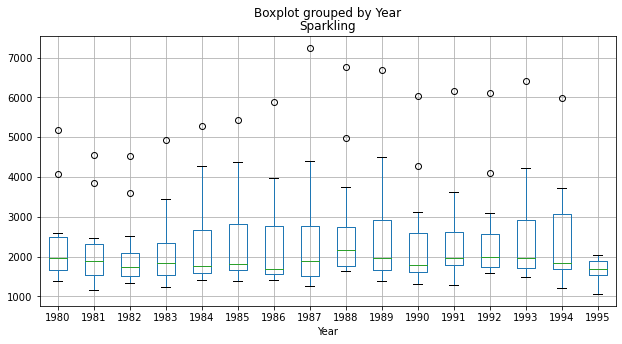

In [9]:
ax = sparkling_df1.boxplot('Sparkling', by= 'Year')

plt.show()

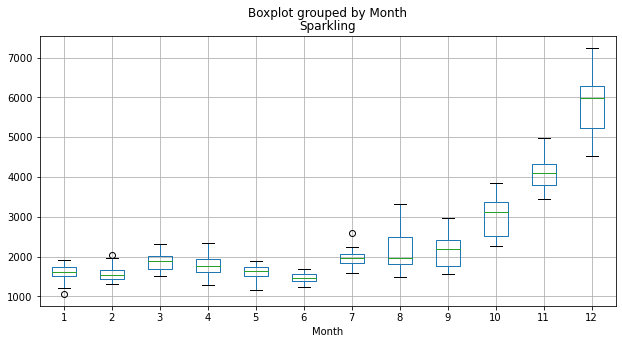

In [10]:
ax = sparkling_df1.boxplot('Sparkling', by= 'Month')

plt.show()

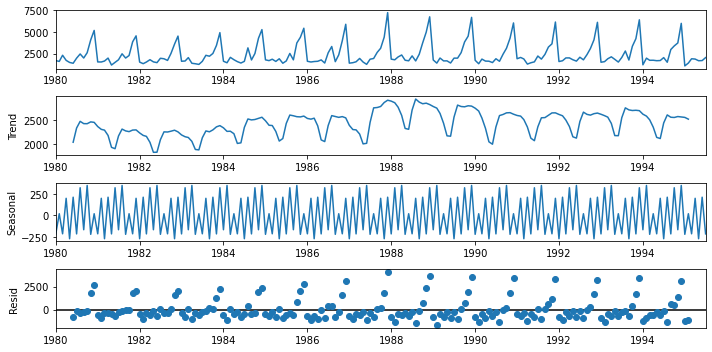

In [11]:
#additive decompose
decompose_sparkling = seasonal_decompose(sparkling_df, model='additive', period=10)


ax = decompose_sparkling.plot()


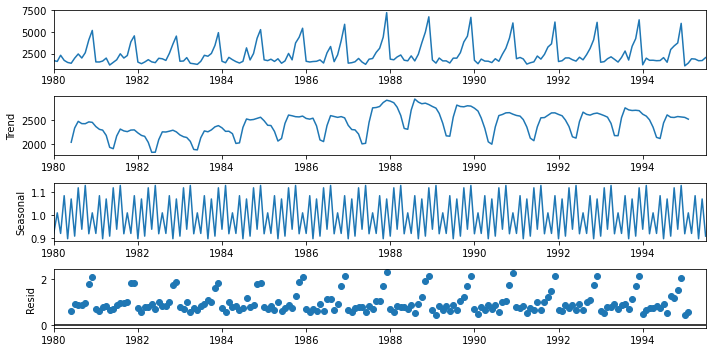

In [12]:
#additive decompose
decompose_sparkling = seasonal_decompose(sparkling_df, model='multiplicative', period=10)


ax = decompose_sparkling.plot()

plt.show()

# 3. Split the data into training and test. The test data should start in 1991.

In [13]:
train_sparkling = sparkling_df1[sparkling_df1['Year'] < 1991]
test_sparkling = sparkling_df1[sparkling_df1['Year'] > 1990]


display(train_sparkling.tail())
print("Train Data:",train_sparkling.shape)
display(test_sparkling.head())
print("Test Data:", test_sparkling.shape)



,Sparkling,Year,Month
YearMonth,,,
1990-08-01,1605,1990,8
1990-09-01,2424,1990,9
1990-10-01,3116,1990,10
1990-11-01,4286,1990,11
1990-12-01,6047,1990,12


Train Data: (132, 3)


,Sparkling,Year,Month
YearMonth,,,
1991-01-01,1902,1991,1
1991-02-01,2049,1991,2
1991-03-01,1874,1991,3
1991-04-01,1279,1991,4
1991-05-01,1432,1991,5


Test Data: (55, 3)


# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

# Model 1: Linear Regression

In [14]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [15]:
train_sparkling.shape

(132, 3)

In [16]:
LR_train_sparkling = train_sparkling.copy()
LR_test_sparkling = test_sparkling.copy()

LR_train_sparkling['time'] = train_time
LR_test_sparkling['time'] = test_time

display(LR_train_sparkling.head())
display(LR_test_sparkling.head())

,Sparkling,Year,Month,time
YearMonth,,,,
1980-01-01,1686,1980,1,1
1980-02-01,1591,1980,2,2
1980-03-01,2304,1980,3,3
1980-04-01,1712,1980,4,4
1980-05-01,1471,1980,5,5


,Sparkling,Year,Month,time
YearMonth,,,,
1991-01-01,1902,1991,1,133
1991-02-01,2049,1991,2,134
1991-03-01,1874,1991,3,135
1991-04-01,1279,1991,4,136
1991-05-01,1432,1991,5,137


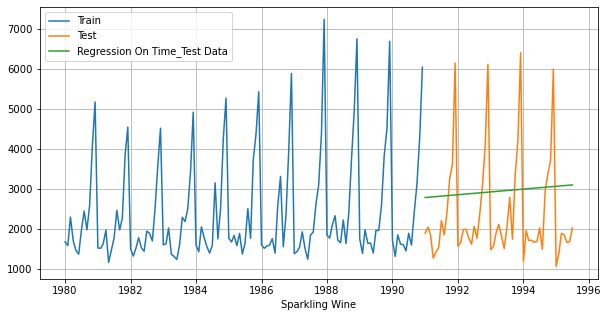

In [17]:
#regression on sparkling
lr_spark = LinearRegression()
lr_spark.fit(LR_train_sparkling[['time']], LR_train_sparkling['Sparkling'])



#train_predictions_model1         = lr_spark.predict(LR_test_sparkling[['time']])
#LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr_spark.predict(LR_test_sparkling[['time']])
LR_test_sparkling['Reg_sparkling'] = test_predictions_model1

plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LR_test_sparkling['Reg_sparkling'], label='Regression On Time_Test Data')
plt.xlabel("Sparkling Wine")
plt.legend(loc='best')
plt.grid();

In [19]:
#evaluation

rmse_model1_test = metrics.mean_squared_error(LR_test_sparkling['Sparkling'],test_predictions_model1,squared=False)
#print("For RegressionOnTime forecast on the Test Data for Sparkling Wine,  RMSE is %3.3f " %(rmse_model1_test))


Spark_resultsDf = pd.DataFrame({'Test_Spark RMSE': [rmse_model1_test]},index=['Regression'])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175


# Model 2: Naive Approach: ŷ t+1=yt

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [20]:
Naive_train_sparkling = train_sparkling.copy()
Naive_test_sparkling = test_sparkling.copy()


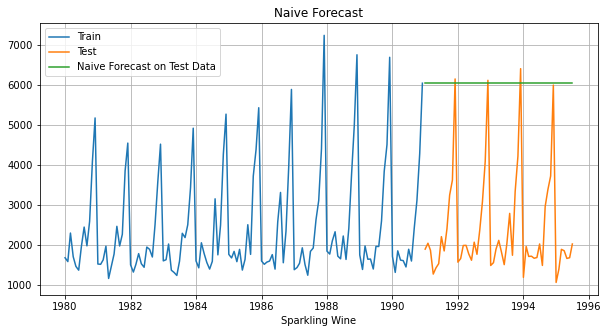

In [21]:
Naive_test_sparkling['naive'] = np.asarray(Naive_train_sparkling['Sparkling'])[len(np.asarray(Naive_train_sparkling['Sparkling']))-1]
#display(Naive_test_sparkling.head())

plt.figure(figsize= (10,5))
plt.plot(Naive_train_sparkling['Sparkling'], label='Train')
plt.plot(Naive_test_sparkling['Sparkling'], label='Test')
plt.plot(Naive_test_sparkling['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Naive Forecast")
plt.grid();

In [22]:
#evaluation

rmse_model2_test = metrics.mean_squared_error(Naive_test_sparkling['Sparkling'],Naive_test_sparkling['naive'],squared=False)


Spark_resultsDf_2 = pd.DataFrame({'Test_Spark RMSE': [rmse_model2_test]},index=['NaiveModel'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf_2])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352


# Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [23]:
SimpleAvg_train_sparkling = train_sparkling.copy()
SimpleAvg_test_sparkling = test_sparkling.copy()


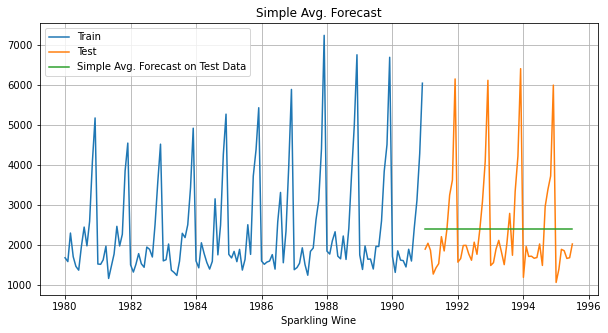

In [25]:
SimpleAvg_test_sparkling['Mean Forecast'] = SimpleAvg_train_sparkling['Sparkling'].mean()

plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAvg_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAvg_test_sparkling['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Simple Avg. Forecast")
plt.grid();

In [26]:
#evaluation

rmse_model3_test = metrics.mean_squared_error(SimpleAvg_test_sparkling['Sparkling'],SimpleAvg_test_sparkling['Mean Forecast'],squared=False)


Spark_resultsDf3 = pd.DataFrame({'Test_Spark RMSE': [rmse_model3_test]},index=['SimpleAvg'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf3])

display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the minimum error.

In [27]:
MA_sparkling = sparkling_df1.copy()
MA_sparkling['Trailing_2'] = MA_sparkling['Sparkling'].rolling(2).mean()
MA_sparkling['Trailing_4'] = MA_sparkling['Sparkling'].rolling(4).mean()
MA_sparkling['Trailing_6'] = MA_sparkling['Sparkling'].rolling(6).mean()
MA_sparkling['Trailing_9'] = MA_sparkling['Sparkling'].rolling(9).mean()

MA_sparkling.head(10)

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1980,6,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1980,7,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,1980,8,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,1980,9,2218.5,1945.00,1827.166667,1838.222222


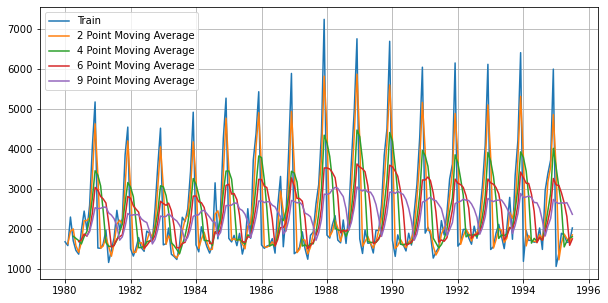

In [33]:
## Plotting on the whole Sparkling wine data

plt.figure(figsize= (10,5))
plt.plot(MA_sparkling['Sparkling'], label='Train')
plt.plot(MA_sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_sparkling['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MA_sparkling['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

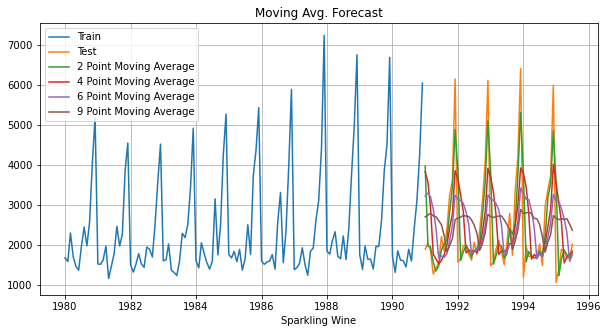

In [28]:
train_MA_spark = MA_sparkling[MA_sparkling['Year'] < 1991]
test_MA_spark = MA_sparkling[MA_sparkling['Year'] > 1990]

plt.figure(figsize= (10,5))
plt.plot(train_MA_spark['Sparkling'], label='Train')
plt.plot(test_MA_spark['Sparkling'], label='Test')
plt.plot(test_MA_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_spark['Trailing_6'], label ='6 Point Moving Average')
plt.plot(test_MA_spark['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Sparkling Wine")
plt.title("Moving Avg. Forecast")
plt.grid();

In [30]:


rmse_model4_test_2 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_2'],squared=False)
rmse_model4_test_4 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_4'],squared=False)
rmse_model4_test_6 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_6'],squared=False)
rmse_model4_test_9 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_9'],squared=False)



Spark_resultsDf4 = pd.DataFrame({'Test_Spark RMSE': [rmse_model4_test_2,rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                                index=['MovingAvg2','MovingAvg4', 'MovingAvg6', 'MovingAvg9' ])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf4])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315


# Exponential Smoothing methods

Exponential smoothing methods consist of flattening time series data.
Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.¶

# Simple Exponential Smoothing (SES)

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

ŷt+1=αYt+(1−α)ŷt
Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Sparkling data doesn't show visible trend however it shows seasonality, Rose data on the other hand shows both trend and seasonality, all the Exponential models will still be bulit on both the datasets.

In [31]:
SES_train_sparkling = train_sparkling.copy()   #SES model
SES_test_sparkling = test_sparkling.copy()


In [32]:
model_SES_spark = SimpleExpSmoothing(SES_train_sparkling['Sparkling'])
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)
display(model_SES_autofit_spark.params)

SES_predict_spark = model_SES_autofit_spark.forecast(steps=len(SES_test_sparkling))



{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Text(0.5, 1.0, 'Alpha = 0.0 Predictions')

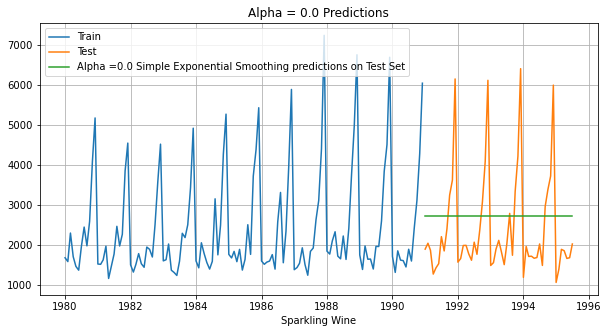

In [33]:
plt.figure(figsize= (10,5))
plt.plot(SES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(SES_test_sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.grid()
plt.title('Alpha = 0.0 Predictions')

In [34]:
#evaluation

rmse_model5_test = metrics.mean_squared_error(SES_predict_spark, SES_test_sparkling['Sparkling'],squared=False)


Spark_resultsDf5 = pd.DataFrame({'Test_Spark RMSE': [rmse_model5_test]},index=['SES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf5])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674


# Double Exponential Smoothing


One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.
Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

Intercept or Level equation, ŷt is given by: ŷt=αyt+(1−α)ŷt
Trend equation is given by Tt=β(ŷt−ŷt−1)+(1−β)Tt−1
Here, α and β are the smoothing constants for level and trend, respectively,

0 <α < 1 and 0 < β < 1.

The forecast at time t + 1 is given by

Ft+1=ŷt+Tt
Ft+n=ŷt+nTt

Though our Sparkling data doesn't seem to have a visible trend we are still going to build this model for the project.
Rose data has a clear trend from the plot above


In [35]:
DES_train_sparkling = train_sparkling.copy()   #DES model
DES_test_sparkling = test_sparkling.copy()


In [36]:
model_DES_spark = Holt(DES_train_sparkling['Sparkling'])
model_DES_autofit_spark = model_DES_spark.fit(optimized=True)
display(model_DES_autofit_spark.params)

DES_predict_spark = model_DES_autofit_spark.forecast(steps=len(DES_test_sparkling))


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

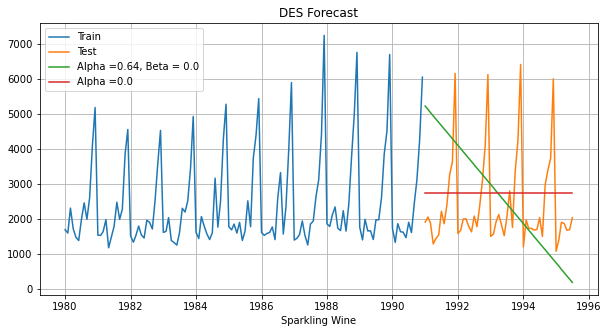

In [37]:
plt.figure(figsize= (10,5))
plt.plot(DES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(DES_test_sparkling['Sparkling'], label='Test')
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("DES Forecast")
plt.grid()

In [38]:
#evaluation

rmse_model6_test = metrics.mean_squared_error(DES_predict_spark, DES_test_sparkling['Sparkling'],squared=False)


Spark_resultsDf6 = pd.DataFrame({'Test_Spark RMSE': [rmse_model6_test]},index=['DES'])


Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf6])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674
DES,2007.238526


Inference
Here, we see that the Double Exponential Smoothing model has picked up the trend component as well.
Our data has seasonlity too so we will include one more smoothing parameter for seasonality which is gamma.

We will use ETS(A, A, A) Holt Winter's linear method with additive trend and seasonality for Sparkling data and ETS(A, A, M) Holt Winter's linear method with additive trend and multiplicative seasonality for Rose wine data

In [39]:
TES_train_sparkling = train_sparkling.copy()   #TES model
TES_test_sparkling = test_sparkling.copy()


In [40]:
model_TES_spark = ExponentialSmoothing(TES_train_sparkling['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark = model_TES_spark.fit(optimized=True)
display(model_TES_autofit_spark.params)

TES_predict_spark = model_TES_autofit_spark.forecast(steps=len(TES_test_sparkling))


{'smoothing_level': 0.11251388262482392,
 'smoothing_trend': 0.03751390043800653,
 'smoothing_seasonal': 0.49368789339692953,
 'damping_trend': nan,
 'initial_level': 1640.1902753907443,
 'initial_trend': -2.8837110960406562,
 'initial_seasons': array([  45.90361105,  -48.98901601,  662.93574184,   72.68956205,
        -168.88460592, -262.45241144,  326.06682266,  813.234229  ,
         344.33127127,  956.08566808, 2446.81374774, 3538.46000598]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

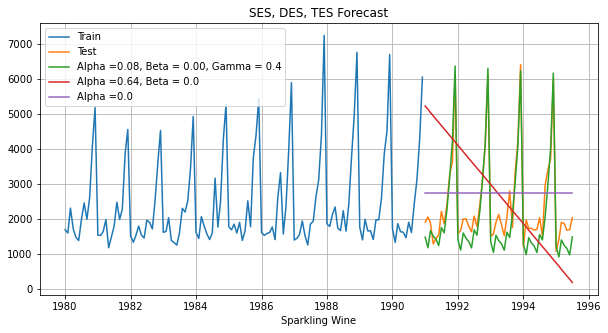

In [41]:
plt.figure(figsize= (10,5))
plt.plot(TES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(TES_test_sparkling['Sparkling'], label='Test')
plt.plot(TES_predict_spark, label='Alpha =0.08, Beta = 0.00, Gamma = 0.4' )
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')


plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

In [42]:
#evaluation

rmse_model0_test = metrics.mean_squared_error(TES_predict_spark, TES_test_sparkling['Sparkling'],squared=False)

Spark_resultsDf0 = pd.DataFrame({'Test_Spark RMSE': [rmse_model0_test]},index=['TES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf0])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674
DES,2007.238526
TES,473.954411


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [43]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sparkling_df)

print('DF test statistic for Sparkling dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])



DF test statistic for Sparkling dataset -1.360
DF test p-value is 0.6011


since the, 
Null Hypothesis H0 : The series is non stationary 
Alternate Hypothesis H1: The series is stationary 

we cannot reject the null as the p value is greater than 0.05 (significance level) from the Augmented Dickey Fuller test above

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Sparkling Train$Test:



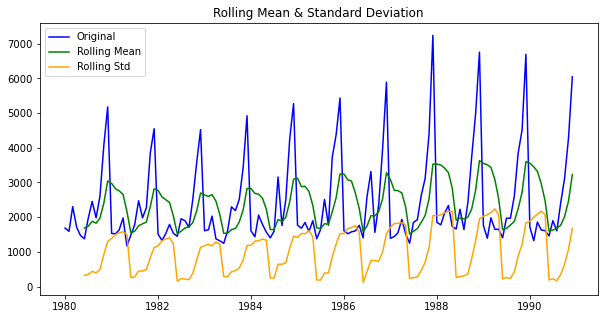

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



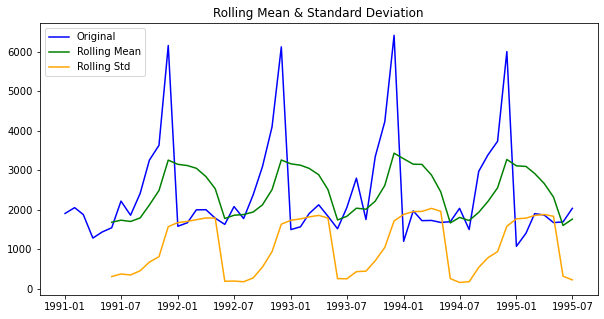

Results of Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [45]:
print("Sparkling Train$Test:\n")
ax = test_stationarity(train_sparkling['Sparkling'])
ax1 = test_stationarity(test_sparkling['Sparkling'])

Differenced Sparkling Data:



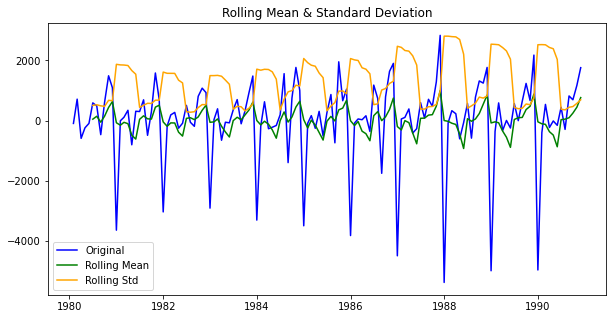

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



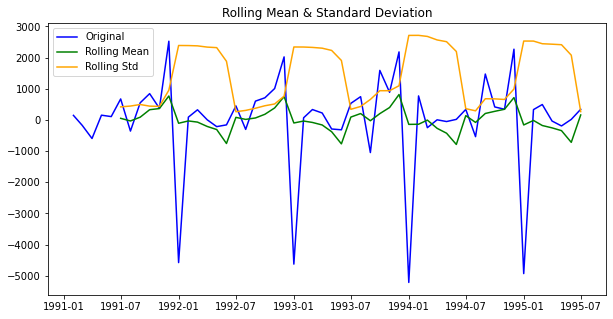

Results of Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [46]:
print("Differenced Sparkling Data:\n")
ax = test_stationarity((train_sparkling['Sparkling']).diff().dropna())
ax1 = test_stationarity((test_sparkling['Sparkling']).diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA

In [47]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [48]:
# Creating an empty Dataframe with column names only  
ARIMA_AIC_sp = pd.DataFrame(columns=['param', 'AIC_Sparkling'])
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_s = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()  #Sparkling dataset
    #print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_sp = ARIMA_AIC_sp.append({'param':param, 'AIC_Sparkling': ARIMA_model_s.aic}, ignore_index=True)
    
display(ARIMA_AIC_sp.sort_values(by='AIC_Sparkling',ascending=True))

,param,AIC_Sparkling
8,"(2, 1, 2)",2210.617008
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906439
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


The smallest AIC for Sparkling dataset is given by the model (2,1,2)

In [49]:
auto_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(2,1,2))

results_auto_ARIMA_s = auto_ARIMA_s.fit()

print("Sparkling Data:\n", results_auto_ARIMA_s.summary())

Sparkling Data:
                              ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.114
Date:                Thu, 17 Jun 2021   AIC                           2210.617
Time:                        20:09:04   BIC                           2227.868
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5860      0.516     10.824      0.000       4.575       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.047      0.000       1.124       1.416
ar.L2.D

In [50]:
predicted_auto_ARIMA_s = results_auto_ARIMA_s.forecast(steps=len(test_sparkling))


rmse_model7_test = metrics.mean_squared_error(predicted_auto_ARIMA_s[0], test_sparkling['Sparkling'],squared=False)


Spark_resultsDf7 = pd.DataFrame({'Test_Spark RMSE': [rmse_model7_test]},index=[' Auto ARIMA (2,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf7])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674
DES,2007.238526
TES,473.954411


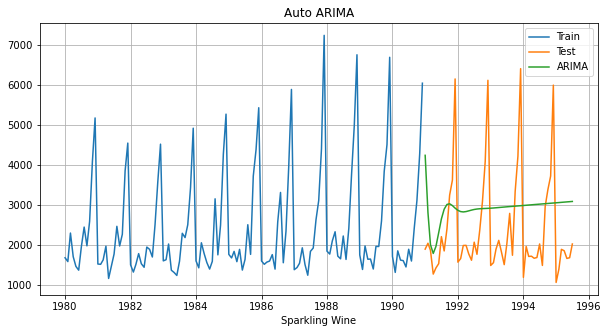

In [51]:
pred_ARIMA = pd.DataFrame({'Pred': predicted_auto_ARIMA_s[0]}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Auto ARIMA")
plt.grid()

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

# ARIMA

<Figure size 720x360 with 0 Axes>

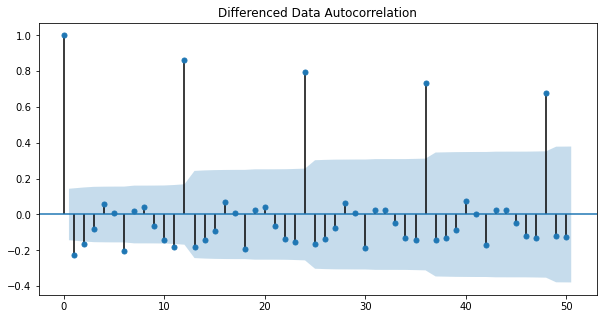

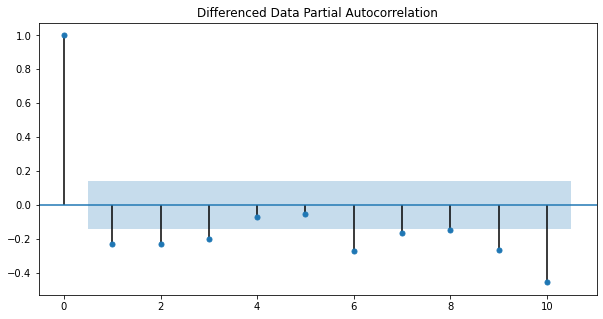

In [52]:
plt.figure(figsize= (10,5))
plot_acf(sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkling_df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots for Sparkling data, we can say that both the PACF cuts off at 3 and ACF plot cuts-off at lag 2.


In [53]:
manual_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(3,1,2))

results_manual_ARIMA_s = manual_ARIMA_s.fit()

print("Sparkling Data:\n", results_manual_ARIMA_s.summary())

Sparkling Data:
                              ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.177
Date:                Thu, 17 Jun 2021   AIC                           2228.928
Time:                        20:10:33   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0117      3.642      1.651      0.099      -1.127      13.150
ar.L1.D.Sparkling    -0.4420   7.85e-06  -5.63e+04      0.000      -0.442      -0.442
ar.L2.D

In [54]:
predicted_manual_ARIMA_s = results_manual_ARIMA_s.forecast(steps=len(test_sparkling))

#rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
#print(rmse)


rmse_model8_test = metrics.mean_squared_error(predicted_manual_ARIMA_s[0], test_sparkling['Sparkling'],squared=False)


Spark_resultsDf8 = pd.DataFrame({'Test_Spark RMSE': [rmse_model8_test]},index=['Manual ARIMA (3,1,2)'])


Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf8])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674
DES,2007.238526
TES,473.954411


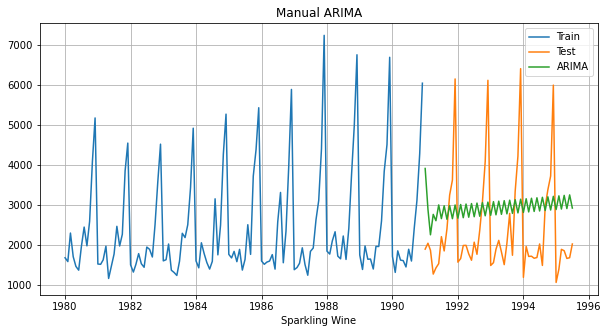

In [55]:
pred_ARIMA_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_s[0]}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA_manual, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Manual ARIMA")
plt.grid()

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# SARIMA

From the ACF plot we see a significant seasonal correlation after every 11th interval Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [58]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [59]:
# Creating an empty Dataframe with column names only  
SARIMA_AIC_s = pd.DataFrame(columns=['param', 'seasonal','AIC_Sparkling'])
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_s = SARIMA_model_s.fit(maxiter=1000)
        SARIMA_AIC_s = SARIMA_AIC_s.append({'param':param,'seasonal':param_seasonal ,'AIC_Sparkling': results_SARIMA_s.aic}, ignore_index=True)
        
display(SARIMA_AIC_s.sort_values(by='AIC_Sparkling',ascending=True))

,param,seasonal,AIC_Sparkling
252,"(3, 1, 3)","(3, 0, 0, 12)",1387.497029
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602614
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681486
222,"(3, 1, 1)","(3, 0, 2, 12)",1389.195898
...,...,...,...
107,"(1, 1, 2)","(2, 0, 3, 12)",3922.243493
39,"(0, 1, 2)","(1, 0, 3, 12)",3934.336452
99,"(1, 1, 2)","(0, 0, 3, 12)",4140.717440
103,"(1, 1, 2)","(1, 0, 3, 12)",4180.376640


In [60]:
auto_SARIMA_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=(3,1,2),
                                            seasonal_order=(3,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_auto_SARIMA_s = auto_SARIMA_s.fit(maxiter=1000)
        

print(results_auto_SARIMA_s.summary())       

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 12)   Log Likelihood                -691.978
Date:                             Thu, 17 Jun 2021   AIC                           1401.955
Time:                                     21:15:28   BIC                           1424.651
Sample:                                          0   HQIC                          1411.116
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0751      2.213     -0.486      0.627      -5.412       3.262
ar.L2         -0.6854      

In [61]:
predicted_auto_SARIMA_s = results_auto_SARIMA_s.forecast(steps=len(test_sparkling))


#rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
#print(rmse)


rmse_model9_test = metrics.mean_squared_error(predicted_auto_SARIMA_s, test_sparkling['Sparkling'],squared=False)


Spark_resultsDf9 = pd.DataFrame({'Test_Spark RMSE': [rmse_model9_test]},index=[' Auto SARIMA (3,1,2)(3,0,0,12)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf9])


display(Spark_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.034674
DES,2007.238526
TES,473.954411


<Figure size 720x504 with 0 Axes>

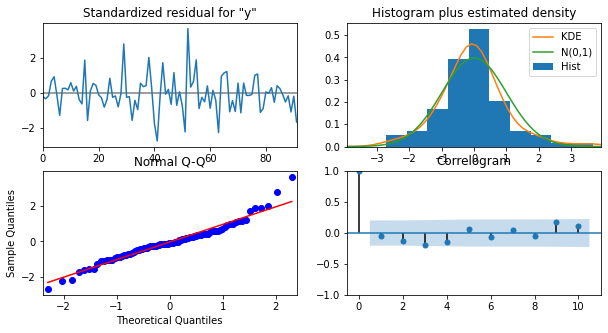

In [63]:
plt.figure(figsize = (10,7))
ax = results_auto_SARIMA_s.plot_diagnostics()

plt.show()

AIC for sparkling data is the lowest for the model (3,1,2), also we saw the from ACF and PACG plots that the cut off of p and q are at 3 and 2 resp.
so we conclude that the auto SARIMAX and the manual SARIMAX models are the same.


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

For Sparkling dataset we see that Triple Exponential smoothing gives the best forecast, so we will move forward with that for forecasting

In [64]:
model_TES_spark_fulldata = ExponentialSmoothing(sparkling_df['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark_fulldata = model_TES_spark_fulldata.fit(optimized=True)
display(model_TES_autofit_spark_fulldata.params)

TES_predict_spark_fulldata = model_TES_autofit_spark_fulldata.forecast(steps=12)

{'smoothing_level': 0.0686141732367326,
 'smoothing_trend': 0.044004090632049644,
 'smoothing_seasonal': 0.4334677345879623,
 'damping_trend': nan,
 'initial_level': 1566.6066335766386,
 'initial_trend': -2.6603425513515564,
 'initial_seasons': array([  93.36972296,   11.36961906,  559.37705643,  208.4640079 ,
         -86.02927257, -136.88612492,  384.5389096 ,  899.83707228,
         443.16170975, 1045.70201437, 2471.32424437, 3538.70944135]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
#TES_predict_spark_fulldata
Sparkling_forecast = pd.DataFrame({'Sparkling Forecast': TES_predict_spark_fulldata})
date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Sparkling_forecast['Time'] = date
Sparkling_forecast.set_index('Time',inplace=True)



std = Sparkling_forecast['Sparkling Forecast'].std()
se = (1.96*std)/np.sqrt(len(Sparkling_forecast))



Sparkling_forecast['lower CI']= Sparkling_forecast['Sparkling Forecast'] - se
Sparkling_forecast['upper CI']= Sparkling_forecast['Sparkling Forecast'] + se
Sparkling_forecast                                                       

,Sparkling Forecast,lower CI,upper CI
Time,,,
1995-08-31,1858.255994,1075.258266,2641.253722
1995-09-30,2432.115009,1649.117282,3215.112737
1995-10-31,3245.953976,2462.956248,4028.951703
1995-11-30,3888.864060,3105.866332,4671.861788
1995-12-31,6100.059441,5317.061713,6883.057169
1996-01-31,1216.618121,433.620393,1999.615848
1996-02-29,1576.207464,793.209737,2359.205192
1996-03-31,1824.617030,1041.619303,2607.614758
1996-04-30,1806.210065,1023.212337,2589.207792


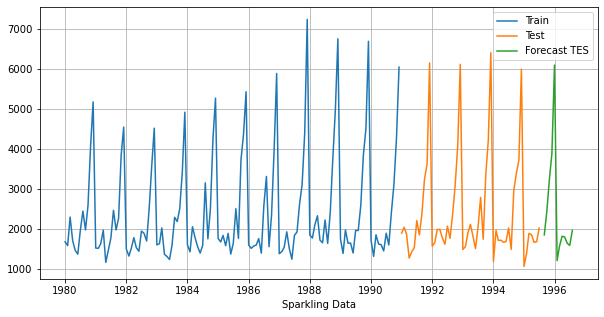

In [66]:
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(Sparkling_forecast['Sparkling Forecast'], label='Forecast TES')

plt.legend(loc='best')
plt.xlabel('Sparkling Data')
plt.grid()

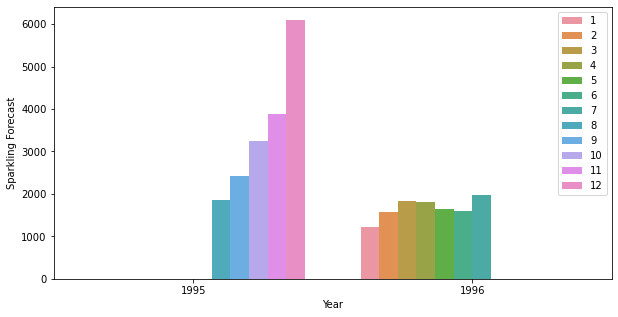

In [67]:
Sparkling_forecast['Year'] = Sparkling_forecast.index.year
Sparkling_forecast['Month'] = Sparkling_forecast.index.month

sns.barplot(x = Sparkling_forecast['Year'], y = Sparkling_forecast['Sparkling Forecast'], hue= Sparkling_forecast['Month'])
plt.legend(loc = 'upper right')
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Sparkling Wine data:
    
1.	1.	TES (Triple Exponential Smoothing) has worked the best for the forecast with lowest RMSE on test data
2.	We can see from the above chart that the forecast for next 12 months is slightly over the sales of the previous 12 months however, there isn't a considerable increase.
3.	Observed from the month wise bar plots previously, we can say that the sales of Sparkling wine tend to go up in last two months probably because it's a holiday season than the rest and its lowest around June and July.
4.	ABC can take various measures to increase the sales towards the beginning and mid of the year, it can introduce promotional activities or discounts during the low sales period, even vineyard tours can be commercialized and organized during the down period, so as to help in sales activities and getting more revenues.
5.	ABC can tie up with events like concerts, weddings, parties etc. and do some sponsorships to boost sales during the slack


